# Introduction to Image Processing

Guillaume Lemaitre - Fabrice Meriaudeau

## Lecture 1 - Digital Image Processing Fundamentals

The needed libraries are imported in the cell below

In [1]:
%matplotlib inline
%pprint off

# Import the library to show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Other plotting library
import seaborn as sns
sns.set()

# Import the library to manage matrix and array
import numpy as np

# Import the library of linear algebra
import scipy as sp

# Import the image processing toolbox
### Module to read, write, etc.
from skimage import io
### Module for color conversion
from skimage import color
### Function to convert the image on 8 bits
from skimage import img_as_ubyte

Pretty printing has been turned OFF


### Welcome to the digital world

The size of the image is - height: 115 px and width: 96 px


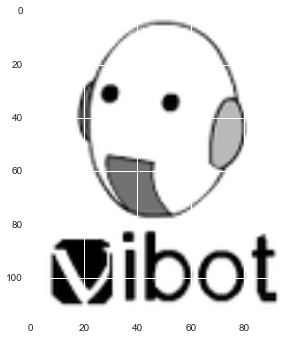

In [5]:
# Define the image to read
filename = 'images/vibot.png'

# Open an image
img = io.imread(filename)
# Convert the image into grayscale
img = color.rgb2gray(img)
# Convert the image into 8 bits
img = img_as_ubyte(img)

# Show the image with grey colormap
plt.imshow(img, cmap = cm.Greys_r)

# Show the dimension of the image
print 'The size of the image is - height: {} px and width: {} px'.format(img.shape[0], img.shape[1])

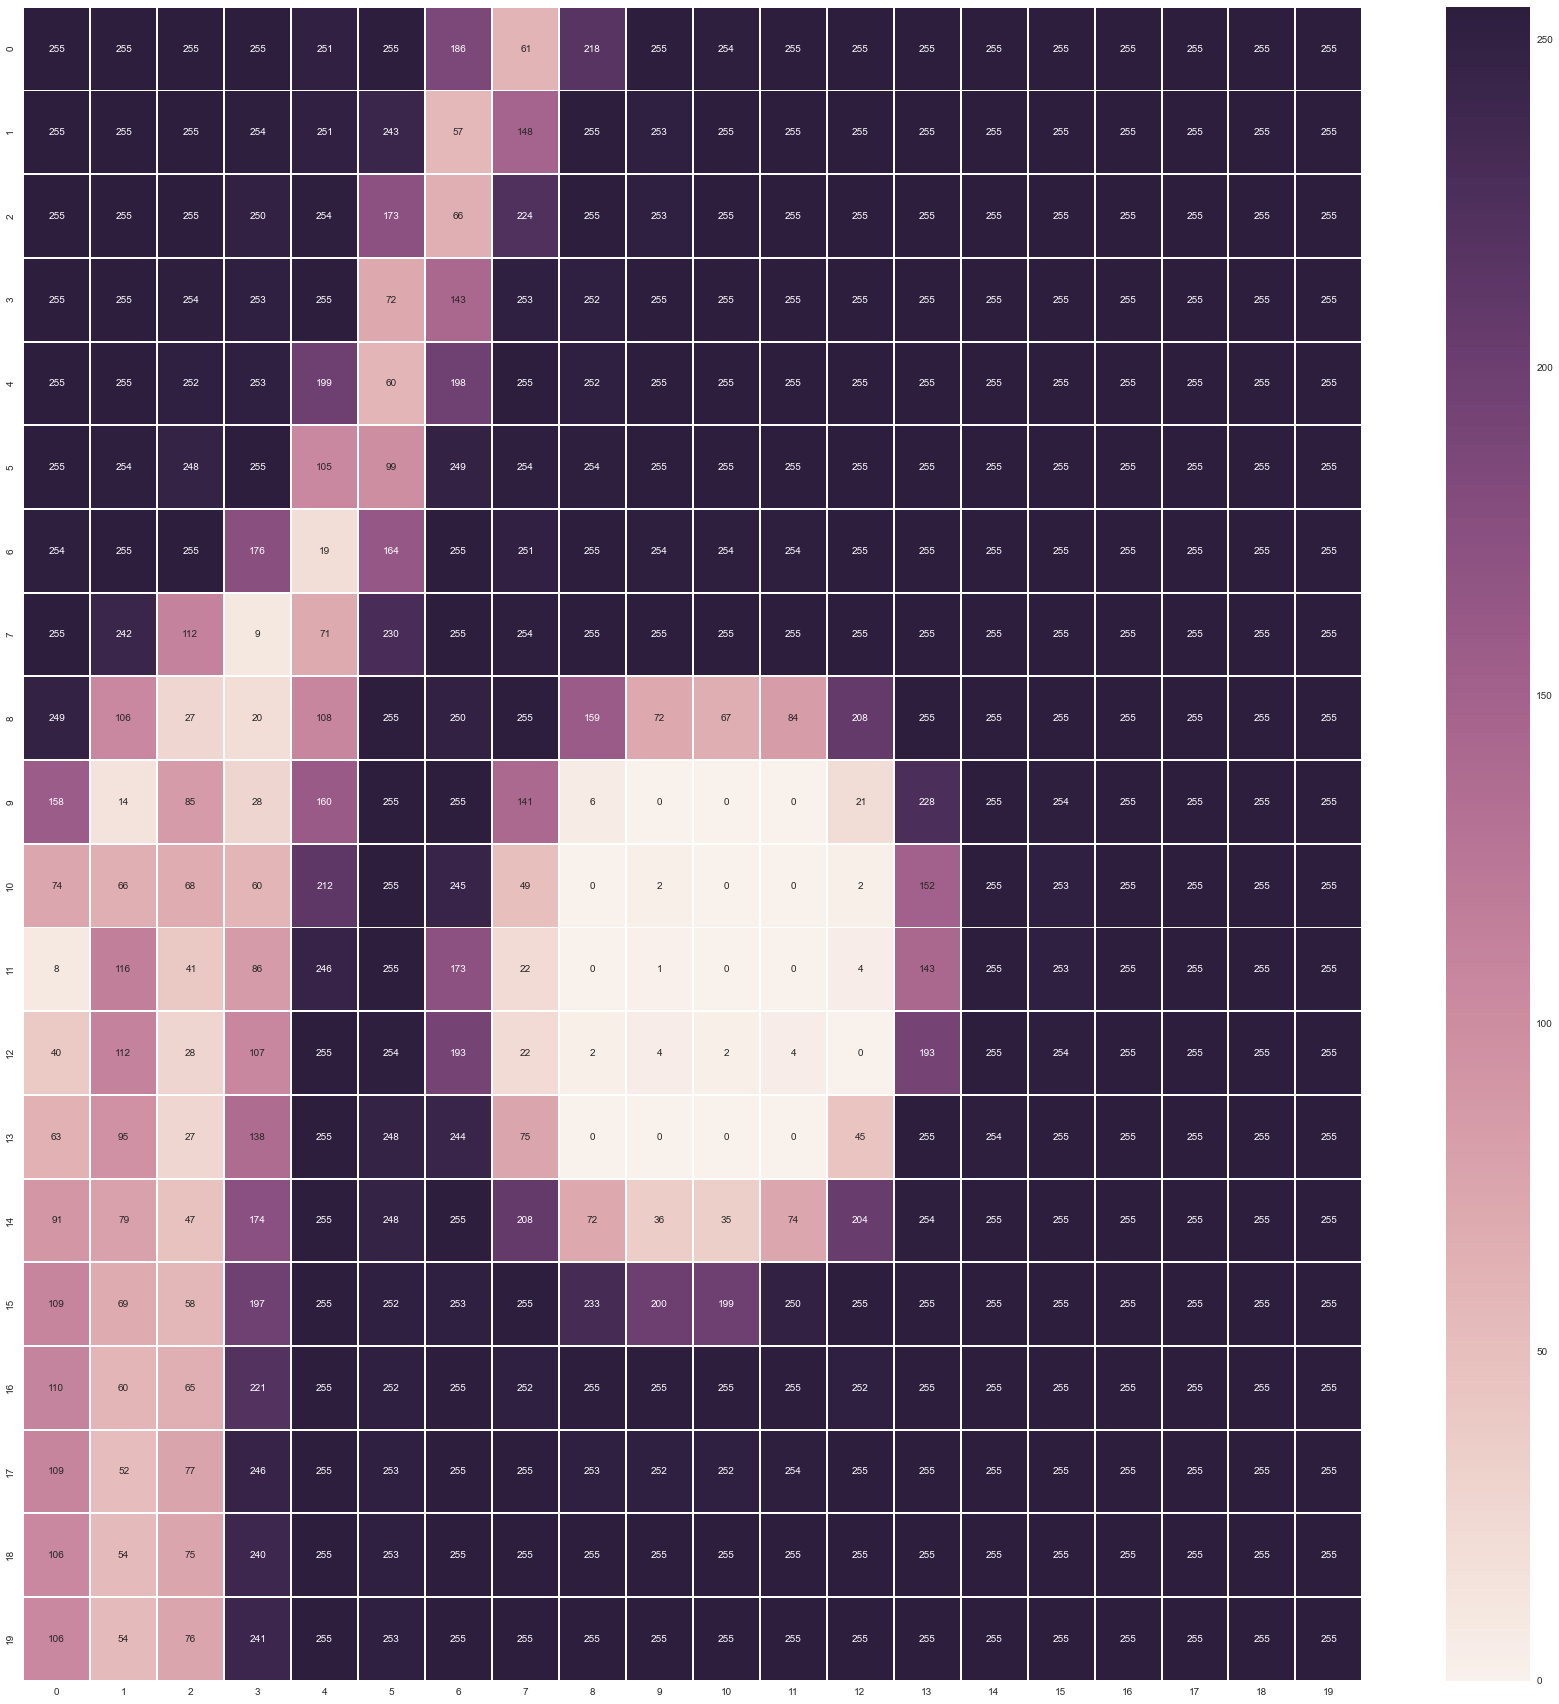

In [6]:
# Show a zooming of the image
plt.figure(figsize=(30, 30))
sns.heatmap(img[20:40, 20:40], annot=True, fmt='d', linewidths=.5)
plt.show()

### Resizing

/home/lemaitre/anaconda/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


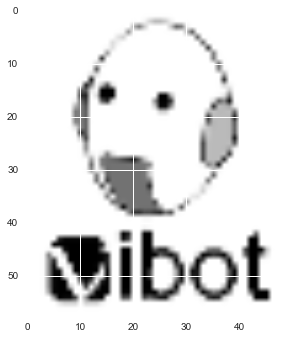

The size of the image is - height: 58 px and width: 48 px


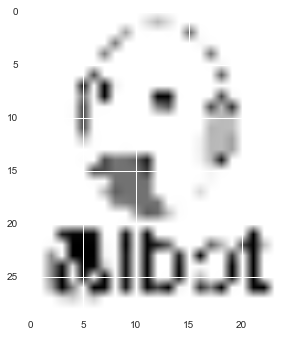

The size of the image is - height: 29 px and width: 24 px


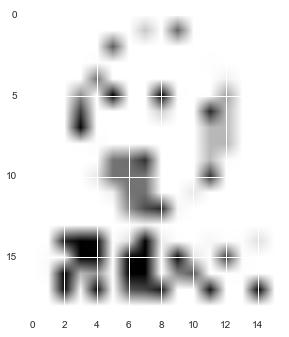

The size of the image is - height: 19 px and width: 16 px


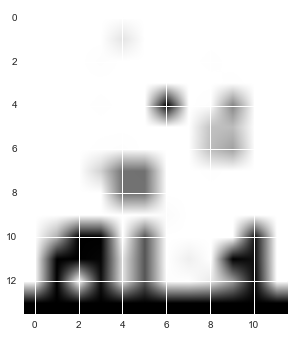

The size of the image is - height: 14 px and width: 12 px


In [7]:
# Import the function to make zooming on the image
from scipy.ndimage.interpolation import zoom

# Let's resize a couple of times the image by down-sampling
for i in np.arange(1., 5.):
    factor_ds = .5 / i
    plt.figure()
    down_img = zoom(img, factor_ds, order=0)
    plt.imshow(down_img, cmap = cm.Greys_r)
    plt.show()
    print 'The size of the image is - height: {} px and width: {} px'.format(down_img.shape[0], down_img.shape[1])

### Quantisation

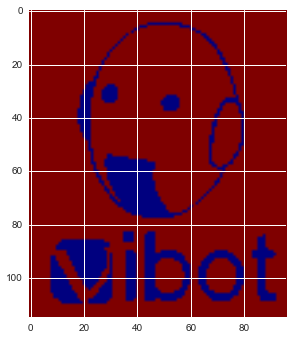

The different intensities are: [0 1]


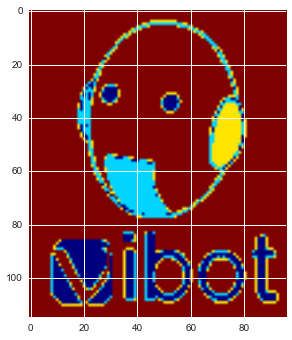

The different intensities are: [0 1 2 3]


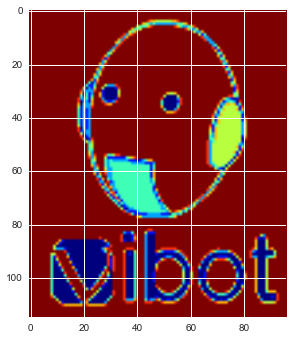

The different intensities are: [0 1 2 3 4 5 6 7]


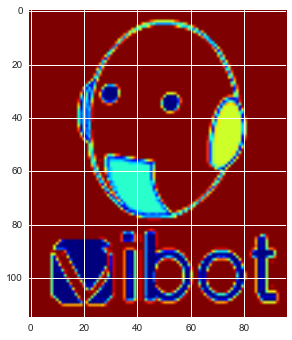

The different intensities are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


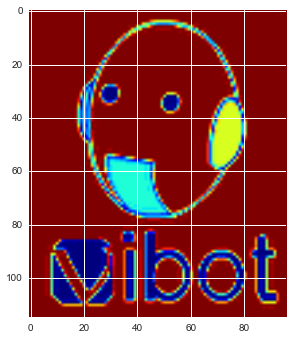

The different intensities are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


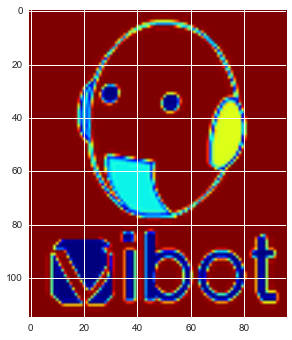

The different intensities are: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


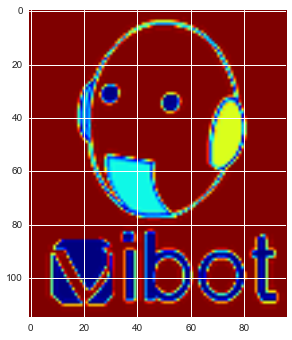

The different intensities are: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]


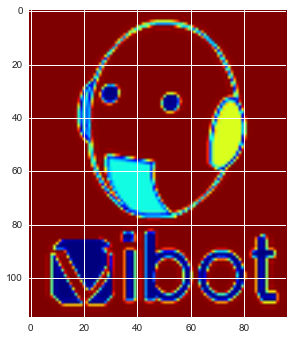

The different intensities are: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 167 168 169 170 171 172 173 174 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242

In [8]:
# Change the dynamic range by reducing the number of gray level
for i in np.arange(1., 9.):
    # Compute the maximum number of gray level
    Lmax = 2.**i - 1.
    # Rescale the image
    resc_fac = Lmax / float(np.max(img))
    down_image = np.round(img * resc_fac).astype(int)

    plt.figure()
    plt.imshow(down_image, cmap=cm.jet)
    plt.show()
    
    print 'The different intensities are: {}'.format(np.unique(down_image))